**Nama** : Cintha Hafrida Putri

**Email** : devdan2510@gmail.com

**Id-Dicoding** : cintha_bang

#About Dataset

Dataset ini memiliki data 1K+ Peringkat dan Ulasan Produk Amazon sesuai detailnya yang tercantum di situs web resmi Amazon

**Fitur**
product_id - ID Produk

product_name - Nama Produk

category - Kategori Produk

discounted_price - Harga Diskon Produk

actual_price - Harga Asli Produk

discount_percentage - Persentase Diskon untuk Produk

rating - Rating Produk

rating_count - Jumlah orang yang memberikan rating di Amazon

about_product - Deskripsi Produk

user_id - ID pengguna yang menulis ulasan untuk Produk

user_name - Nama pengguna yang menulis ulasan untuk Produk

review_id - ID ulasan pengguna

review_title - Judul ulasan

review_content - Isi ulasan

img_link - Link Gambar Produk

product_link - Link Resmi Produk di Situs Web

img_link - Tautan Gambar Produk

product_link - Tautan Situs Web Resmi Produk
Inspirasi

Import library dan modul

In [25]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import warnings
warnings.filterwarnings('ignore')
from sklearn.preprocessing import MultiLabelBinarizer
from sklearn.decomposition import PCA
from sklearn.cluster import DBSCAN


# Data Loading

Pada tahap ini saya memuat data yang akan dianalisis. Dimana saya mendownload terlebih dahulu dataset yang akan digunakan kemudian saya upload ke Google Drive agar lebih mudah untuk diakses.

In [26]:
df = pd.read_csv('/content/drive/MyDrive/DICODING MACHINE LEARNING/Proyek pertama Machine Learning Terapan/amazon.csv')
df.head()

,product_id,product_name,category,discounted_price,actual_price,discount_percentage,rating,rating_count,about_product,user_id,user_name,review_id,review_title,review_content,img_link,product_link
0,B07JW9H4J1,Wayona Nylon Braided USB to Lightning Fast Cha...,Computers&Accessories|Accessories&Peripherals|...,₹399,"₹1,099",64%,4.2,"24,269",High Compatibility : Compatible With iPhone 12...,"AG3D6O4STAQKAY2UVGEUV46KN35Q,AHMY5CWJMMK5BJRBB...","Manav,Adarsh gupta,Sundeep,S.Sayeed Ahmed,jasp...","R3HXWT0LRP0NMF,R2AJM3LFTLZHFO,R6AQJGUP6P86,R1K...","Satisfied,Charging is really fast,Value for mo...",Looks durable Charging is fine tooNo complains...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Wayona-Braided-WN3LG1-Sy...
1,B098NS6PVG,Ambrane Unbreakable 60W / 3A Fast Charging 1.5...,Computers&Accessories|Accessories&Peripherals|...,₹199,₹349,43%,4.0,"43,994","Compatible with all Type C enabled devices, be...","AECPFYFQVRUWC3KGNLJIOREFP5LQ,AGYYVPDD7YG7FYNBX...","ArdKn,Nirbhay kumar,Sagar Viswanathan,Asp,Plac...","RGIQEG07R9HS2,R1SMWZQ86XIN8U,R2J3Y1WL29GWDE,RY...","A Good Braided Cable for Your Type C Device,Go...",I ordered this cable to connect my phone to An...,https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Ambrane-Unbreakable-Char...
2,B096MSW6CT,Sounce Fast Phone Charging Cable & Data Sync U...,Computers&Accessories|Accessories&Peripherals|...,₹199,"₹1,899",90%,3.9,"7,928",【 Fast Charger& Data Sync】-With built-in safet...,"AGU3BBQ2V2DDAMOAKGFAWDDQ6QHA,AESFLDV2PT363T2AQ...","Kunal,Himanshu,viswanath,sai niharka,saqib mal...","R3J3EQQ9TZI5ZJ,R3E7WBGK7ID0KV,RWU79XKQ6I1QF,R2...","Good speed for earlier versions,Good Product,W...","Not quite durable and sturdy,https://m.media-a...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Sounce-iPhone-Charging-C...
3,B08HDJ86NZ,boAt Deuce USB 300 2 in 1 Type-C & Micro USB S...,Computers&Accessories|Accessories&Peripherals|...,₹329,₹699,53%,4.2,"94,363",The boAt Deuce USB 300 2 in 1 cable is compati...,"AEWAZDZZJLQUYVOVGBEUKSLXHQ5A,AG5HTSFRRE6NL3M5S...","Omkar dhale,JD,HEMALATHA,Ajwadh a.,amar singh ...","R3EEUZKKK9J36I,R3HJVYCLYOY554,REDECAZ7AMPQC,R1...","Good product,Good one,Nice,Really nice product...","Good product,long wire,Charges good,Nice,I bou...",https://m.media-amazon.com/images/I/41V5FtEWPk...,https://www.amazon.in/Deuce-300-Resistant-Tang...
4,B08CF3B7N1,Portronics Konnect L 1.2M Fast Charging 3A 8 P...,Computers&Accessories|Accessories&Peripherals|...,₹154,₹399,61%,4.2,"16,905",[CHARGE & SYNC FUNCTION]- This cable comes wit...,"AE3Q6KSUK5P75D5HFYHCRAOLODSA,AFUGIFH5ZAFXRDSZH...","rahuls6099,Swasat Borah,Ajay Wadke,Pranali,RVK...","R1BP4L2HH9TFUP,R16PVJEXKV6QZS,R2UPDB81N66T4P,R...","As good as original,Decent,Good one for second...","Bought this instead of original apple, does th...",https://m.media-amazon.com/images/W/WEBP_40237...,https://www.amazon.in/Portronics-Konnect-POR-1...


# Exploratory Data Analys (EDA)


Pada EDA ini saya akan mengecek struktur data, informasi data, mengidentivikasi adanya missing value, serta menampilkan distribusi kolom numerik.

In [27]:
df.shape

(1465, 16)

In [28]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype 
---  ------               --------------  ----- 
 0   product_id           1465 non-null   object
 1   product_name         1465 non-null   object
 2   category             1465 non-null   object
 3   discounted_price     1465 non-null   object
 4   actual_price         1465 non-null   object
 5   discount_percentage  1465 non-null   object
 6   rating               1465 non-null   object
 7   rating_count         1463 non-null   object
 8   about_product        1465 non-null   object
 9   user_id              1465 non-null   object
 10  user_name            1465 non-null   object
 11  review_id            1465 non-null   object
 12  review_title         1465 non-null   object
 13  review_content       1465 non-null   object
 14  img_link             1465 non-null   object
 15  product_link         1465 non-null   object
dtypes: obj

Mengidentifikasi Missing Value

In [29]:
# Identifikasi data yang hilang
missing_values = df.isnull().sum()
print("\nJumlah data yang hilang per kolom:")
print(missing_values)


Jumlah data yang hilang per kolom:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           2
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


Terdapat missing value pada kolom rating_count nantinya akan di handling saat Preprocessing


Tahap ini adalah visualisasi data numerik (namun saat ini typedatanya masih object)

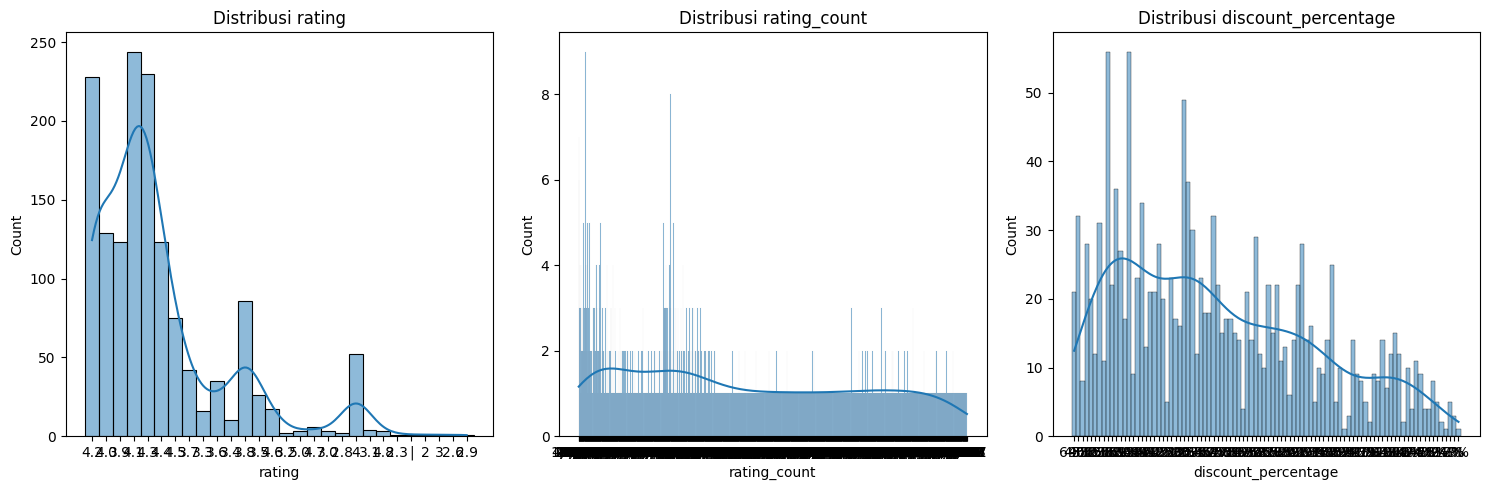

In [30]:
# Distribusi variabel numerik
numerical_cols = ['rating', 'rating_count', 'discount_percentage']
plt.figure(figsize=(15, 5))
for i, col in enumerate(numerical_cols, 1):
  plt.subplot(1, 3, i)
  sns.histplot(df[col], kde=True)
  plt.title(f'Distribusi {col}')
plt.tight_layout()
plt.show()

#Preprocessing

Dari proses EDA kita tahu bahwa beberapa data yang seharusnya memiliki tipe numerik sehingga membuat visualisasi kolom numerik tidak terbaca, serta terdapat missing value pada salah satu kolom.

Pada Tahap Preprocessing ini akan dilakukan penyesuaian tipe data, handling missing value, analisis statistik descriptif data, serta visualisasi kolerasi.

In [31]:
# Konversi tipe data
df['discounted_price'] = df['discounted_price'].str.replace('₹','').str.replace(',','').astype(float)
df['actual_price'] = df['actual_price'].str.replace('₹','').str.replace(',','').astype(float)
df['discount_percentage'] = df['discount_percentage'].str.rstrip('%').astype(float)
df['rating'] = pd.to_numeric(df['rating'], errors='coerce')
df['rating_count'] = df['rating_count'].str.replace(',','').astype(float)


In [32]:
# Analisis statistik dasar
numeric_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

# Statistik Deskriptif Variabel Numerik
print("\nStatistik Deskriptif Variabel Numerik:")
print(df[numeric_columns].describe())


Statistik Deskriptif Variabel Numerik:
       discounted_price   actual_price  discount_percentage       rating   rating_count
count       1465.000000    1465.000000          1465.000000  1464.000000    1463.000000
mean        3125.310874    5444.990635            47.691468     4.096585   18295.541353
std         6944.304394   10874.826864            21.635905     0.291674   42753.864952
min           39.000000      39.000000             0.000000     2.000000       2.000000
25%          325.000000     800.000000            32.000000     4.000000    1186.000000
50%          799.000000    1650.000000            50.000000     4.100000    5179.000000
75%         1999.000000    4295.000000            63.000000     4.300000   17336.500000
max        77990.000000  139900.000000            94.000000     5.000000  426973.000000


Handling Missing Value

Mengisi missing value menggunakan median, karena kolom rating menggunakan skala 1-5 sehingga jika menggunakan mean bisa membuat data yang diisikan tidak umum (4.222). Kolom rating_count juga diisi dengan median karena memiliki distribusi skewed.

In [33]:
# Rating
df['rating'].fillna(df['rating'].median(), inplace=True)

# Rating Count
df['rating_count'].fillna(df['rating_count'].median(), inplace=True)

In [34]:
# cek update data hilang
missing_values = df.isnull().sum()
print("\nJumlah data yang hilang per kolom:")
print(missing_values)


Jumlah data yang hilang per kolom:
product_id             0
product_name           0
category               0
discounted_price       0
actual_price           0
discount_percentage    0
rating                 0
rating_count           0
about_product          0
user_id                0
user_name              0
review_id              0
review_title           0
review_content         0
img_link               0
product_link           0
dtype: int64


In [35]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1465 entries, 0 to 1464
Data columns (total 16 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   product_id           1465 non-null   object 
 1   product_name         1465 non-null   object 
 2   category             1465 non-null   object 
 3   discounted_price     1465 non-null   float64
 4   actual_price         1465 non-null   float64
 5   discount_percentage  1465 non-null   float64
 6   rating               1465 non-null   float64
 7   rating_count         1465 non-null   float64
 8   about_product        1465 non-null   object 
 9   user_id              1465 non-null   object 
 10  user_name            1465 non-null   object 
 11  review_id            1465 non-null   object 
 12  review_title         1465 non-null   object 
 13  review_content       1465 non-null   object 
 14  img_link             1465 non-null   object 
 15  product_link         1465 non-null   o

Memisahkan kolom numerikal dan kategorikal untuk dapat dianalisis dengan mudah

In [36]:
# Memisahkan kolom numerikal dan kategorikal
numerical_columns = df.select_dtypes(include=['float64']).columns
categorical_columns = df.select_dtypes(include=['object']).columns

print(f"Kolom numerikal: {list(numerical_columns)}")
print(f"Kolom kategorikal: {list(categorical_columns)}")

Kolom numerikal: ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']
Kolom kategorikal: ['product_id', 'product_name', 'category', 'about_product', 'user_id', 'user_name', 'review_id', 'review_title', 'review_content', 'img_link', 'product_link']


Pada tahap ini dilakukan visualisasi matriks korelasi dan distribusi kolom numerik

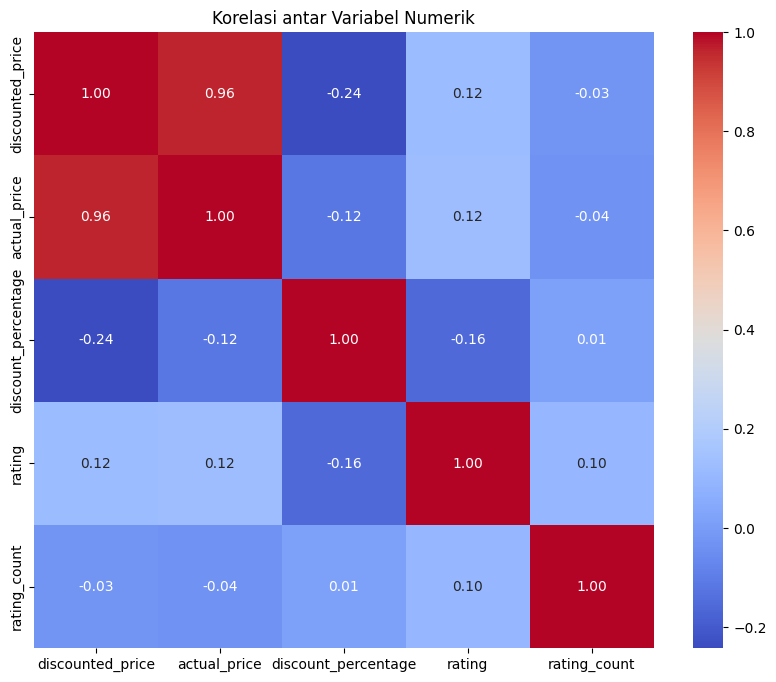

In [37]:
"""Visualisasi korelasi antar variabel numerik"""
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(10, 8))
correlation_matrix = df[numerical_columns].corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Korelasi antar Variabel Numerik')
plt.show()

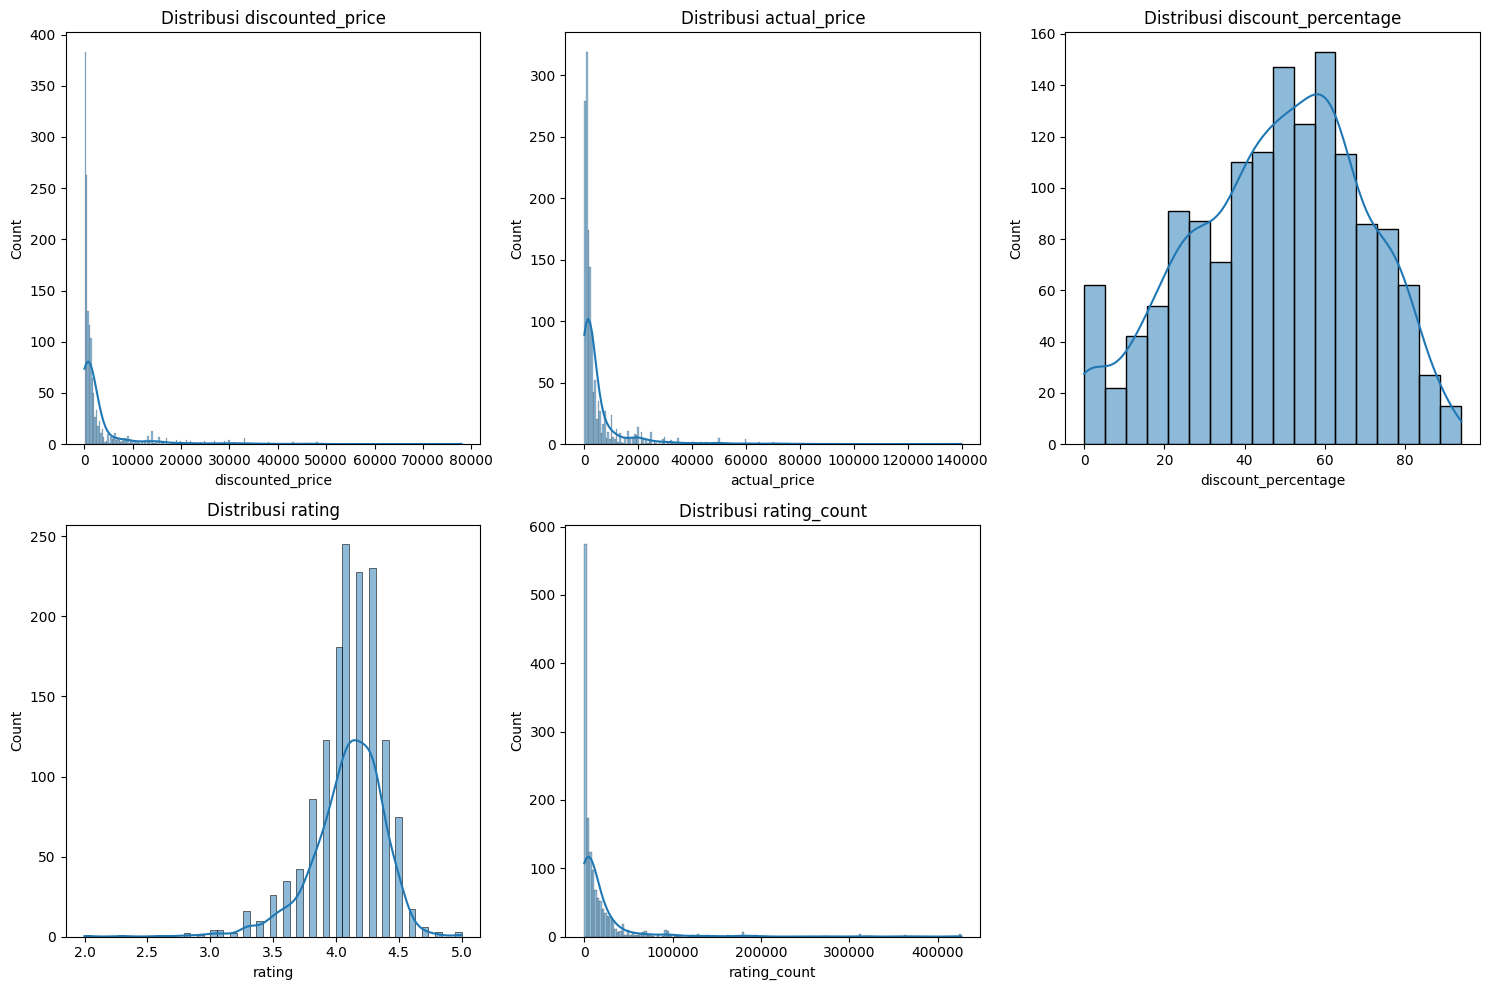

In [38]:
# Visualisasi distribusi kolom numerik
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15, 10))
for i, column in enumerate(numerical_columns, 1):
  plt.subplot(2, 3, i)
  sns.histplot(df[column], kde=True)
  plt.title(f'Distribusi {column}')
plt.tight_layout()
plt.show()

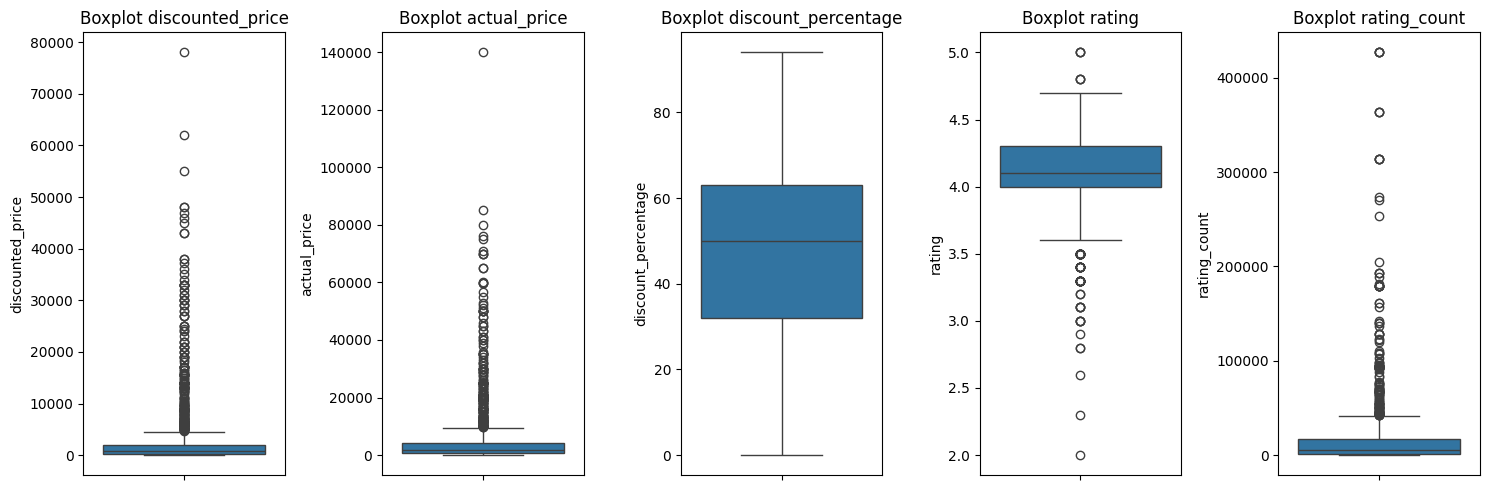

In [39]:
"""Analisis outlier menggunakan box plots"""
numerical_columns = ['discounted_price', 'actual_price', 'discount_percentage', 'rating', 'rating_count']

plt.figure(figsize=(15, 5))
for i, column in enumerate(numerical_columns, 1):
    plt.subplot(1, 5, i)
    sns.boxplot(y=df[column])
    plt.title(f'Boxplot {column}')
plt.tight_layout()
plt.show()

Outlier pada actual_price, discounted_price, rating_count adalah hal yang normal karena memang datanya pasti bervariasi. berbeda dengan discount_precentage dan rating yang datanya cenderung normal

# Modelling


## Model 1 K-Means

Model 1 K-Means menerapkan fitur selection dimana hanya beberapa fitur saja yang akan dianalisis

In [40]:
# Select features for clustering
features = ['rating', 'rating_count', 'discount_percentage']
data_selected_features = df[features]

In [41]:
scaler = StandardScaler()
numeric_features = ['rating', 'rating_count', 'discount_percentage']  # Hanya fitur numerik yang relevan
data_selected_features[numeric_features] = scaler.fit_transform(data_selected_features[numeric_features])

In [42]:
# Setelah pembagian, lanjutkan dengan K-Means
inertias = []
silhouette_scores = []
ch_scores = []

K = range(2, 11)  # Jumlah cluster yang ingin diuji

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_selected_features)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_selected_features, kmeans.labels_))


For n_clusters = 2, the average silhouette_score is : 0.2909305765925251
For n_clusters = 3, the average silhouette_score is : 0.315628834712412
For n_clusters = 4, the average silhouette_score is : 0.329351103191962
For n_clusters = 5, the average silhouette_score is : 0.34701146530612215
For n_clusters = 6, the average silhouette_score is : 0.31306197779358436
For n_clusters = 7, the average silhouette_score is : 0.3013267749013532
For n_clusters = 8, the average silhouette_score is : 0.3088216285171754
For n_clusters = 9, the average silhouette_score is : 0.2937471004380817
For n_clusters = 10, the average silhouette_score is : 0.2936962039978218


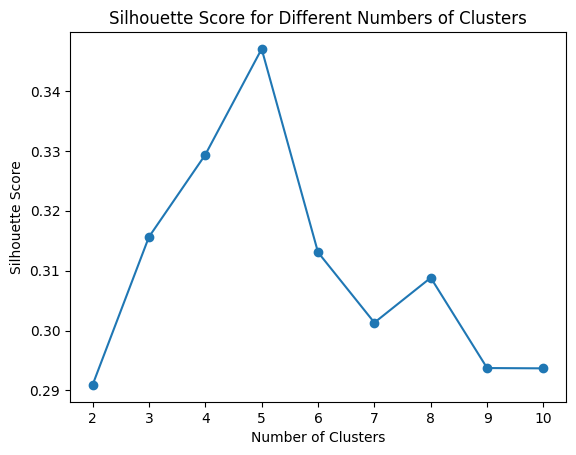

In [43]:
silhouette_scores = []
for n_clusters in range(2, 11):  # Uji jumlah cluster dari 2 hingga 10
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_selected_features)
    silhouette_avg = silhouette_score(data_selected_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores untuk setiap jumlah cluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

In [44]:
# menentukan jumlah cluster yang optimal
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_selected_features)
    silhouette_avg = silhouette_score(data_selected_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"\nThe optimal number of clusters is: {optimal_n_clusters}")

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(data_selected_features)

For n_clusters = 2, the average silhouette_score is : 0.2909305765925251
For n_clusters = 3, the average silhouette_score is : 0.315628834712412
For n_clusters = 4, the average silhouette_score is : 0.329351103191962
For n_clusters = 5, the average silhouette_score is : 0.34701146530612215
For n_clusters = 6, the average silhouette_score is : 0.31306197779358436
For n_clusters = 7, the average silhouette_score is : 0.3013267749013532
For n_clusters = 8, the average silhouette_score is : 0.3088216285171754
For n_clusters = 9, the average silhouette_score is : 0.2937471004380817
For n_clusters = 10, the average silhouette_score is : 0.2936962039978218

The optimal number of clusters is: 5


KMeans(n_clusters=5, random_state=42)

Model 1 K-Means menunjukkan nilai silhoutte score yang rendah sehingga perlu untuk mencoba skema lain

## Model 2 K-Means

Pada Model 2 K-Means saya menambahkan features baru untuk dianalisis yaitu price ratio dan review length

In [45]:

df['price_ratio'] = df['actual_price'] / df['discounted_price']

df['review_length'] = df['review_content'].apply(lambda x: len(str(x)) if isinstance(x, str) else 0)

features = ['rating', 'rating_count', 'discount_percentage', 'price_ratio', 'review_length']

data_update_features = df[features]


In [47]:
# Setelah pembagian, lanjutkan dengan K-Means
inertias = []
silhouette_scores = []
ch_scores = []

K = range(2, 11)  # Jumlah cluster yang ingin diuji

for k in K:
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(data_update_features)

    inertias.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(data_update_features, kmeans.labels_))


For n_clusters = 2, the average silhouette_score is : 0.8997343627882889
For n_clusters = 3, the average silhouette_score is : 0.8436453353589385
For n_clusters = 4, the average silhouette_score is : 0.7097851766540361
For n_clusters = 5, the average silhouette_score is : 0.6922150086427509
For n_clusters = 6, the average silhouette_score is : 0.6928523383369697
For n_clusters = 7, the average silhouette_score is : 0.6700333172333359
For n_clusters = 8, the average silhouette_score is : 0.6570731795591772
For n_clusters = 9, the average silhouette_score is : 0.6134471118702919
For n_clusters = 10, the average silhouette_score is : 0.5796642122846566


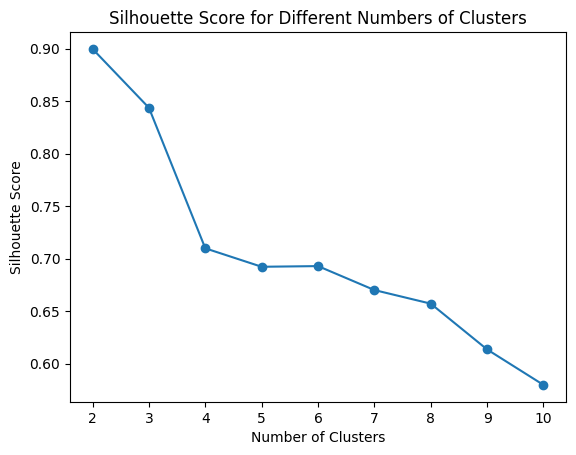

In [48]:
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_update_features)
    silhouette_avg = silhouette_score(data_update_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

# Plot silhouette scores untuk setiap jumlah cluster
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.xlabel("Number of Clusters")
plt.ylabel("Silhouette Score")
plt.title("Silhouette Score for Different Numbers of Clusters")
plt.show()

In [49]:
# menentukan jumlah cluster yang optimal
silhouette_scores = []
for n_clusters in range(2, 11):
    kmeans = KMeans(n_clusters=n_clusters, random_state=42)
    cluster_labels = kmeans.fit_predict(data_update_features)
    silhouette_avg = silhouette_score(data_update_features, cluster_labels)
    silhouette_scores.append(silhouette_avg)
    print(f"For n_clusters = {n_clusters}, the average silhouette_score is : {silhouette_avg}")

optimal_n_clusters = silhouette_scores.index(max(silhouette_scores)) + 2

print(f"\nThe optimal number of clusters is: {optimal_n_clusters}")

kmeans = KMeans(n_clusters=optimal_n_clusters, random_state=42)
kmeans.fit(data_selected_features)

For n_clusters = 2, the average silhouette_score is : 0.8997343627882889
For n_clusters = 3, the average silhouette_score is : 0.8436453353589385
For n_clusters = 4, the average silhouette_score is : 0.7097851766540361
For n_clusters = 5, the average silhouette_score is : 0.6922150086427509
For n_clusters = 6, the average silhouette_score is : 0.6928523383369697
For n_clusters = 7, the average silhouette_score is : 0.6700333172333359
For n_clusters = 8, the average silhouette_score is : 0.6570731795591772
For n_clusters = 9, the average silhouette_score is : 0.6134471118702919
For n_clusters = 10, the average silhouette_score is : 0.5796642122846566

The optimal number of clusters is: 2


KMeans(n_clusters=2, random_state=42)

Model 2 K-Means menunjukkan nilai silhoutte yang tinggi dengan cluster optimal 2

In [50]:
# Clustering dengan Jumlah Cluster Optimal
optimal_clusters = 2
kmeans = KMeans(n_clusters=optimal_clusters, random_state=42)
kmeans_labels = kmeans.fit_predict(data_update_features)

# Evaluasi dengan Silhouette Score
silhouette_avg = silhouette_score(data_update_features, kmeans_labels)
print(f"Silhouette Score untuk {optimal_clusters} clusters: {silhouette_avg}")

# Menambahkan label cluster ke DataFrame asli
df['Cluster'] = kmeans_labels
print(df[['Cluster'] + features].head())

Silhouette Score untuk 2 clusters: 0.8997343627882889
   Cluster  rating  rating_count  discount_percentage  price_ratio  review_length
0        0     4.2       24269.0                 64.0     2.754386            483
1        0     4.0       43994.0                 43.0     1.753769           1186
2        0     3.9        7928.0                 90.0     9.542714            271
3        0     4.2       94363.0                 53.0     2.124620            443
4        0     4.2       16905.0                 61.0     2.590909           2451


In [51]:
cluster_characteristics = df.groupby('Cluster')[features].describe()
print(cluster_characteristics)


         rating                                ... review_length                                
          count      mean       std  min  25%  ...           min    25%     50%     75%      max
Cluster                                        ...                                              
0        1423.0  4.094659  0.294511  2.0  4.0  ...          67.0  498.5   789.0  1385.0  18547.0
1          42.0  4.161905  0.151339  3.8  4.1  ...         195.0  904.0  1019.0  1610.0  13239.0

[2 rows x 40 columns]


## Visualisasi Hasil Clustering K-Means


Pada Tahap ini saya akan menampilkan visualisasi dari Model 2 sebagai model terbaik.

In [52]:
cluster_0 =['Cluster'] == 0
cluster_1 =['Cluster'] == 1


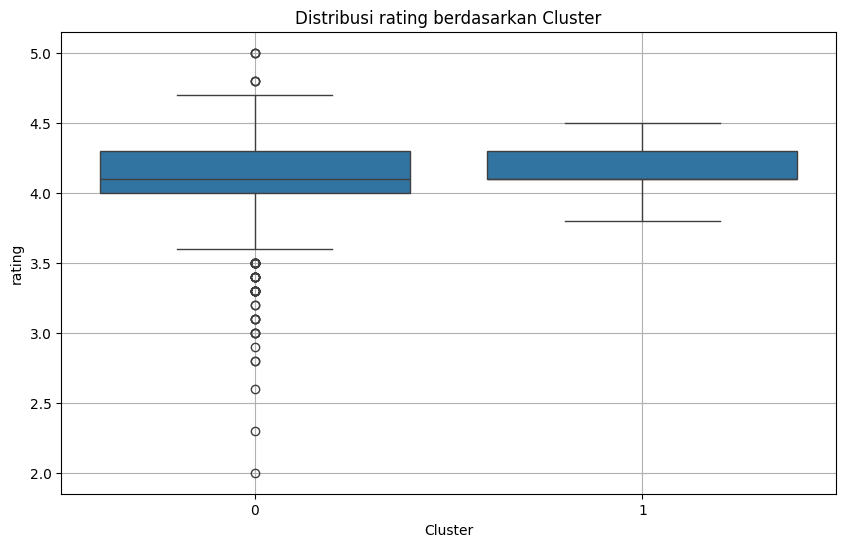

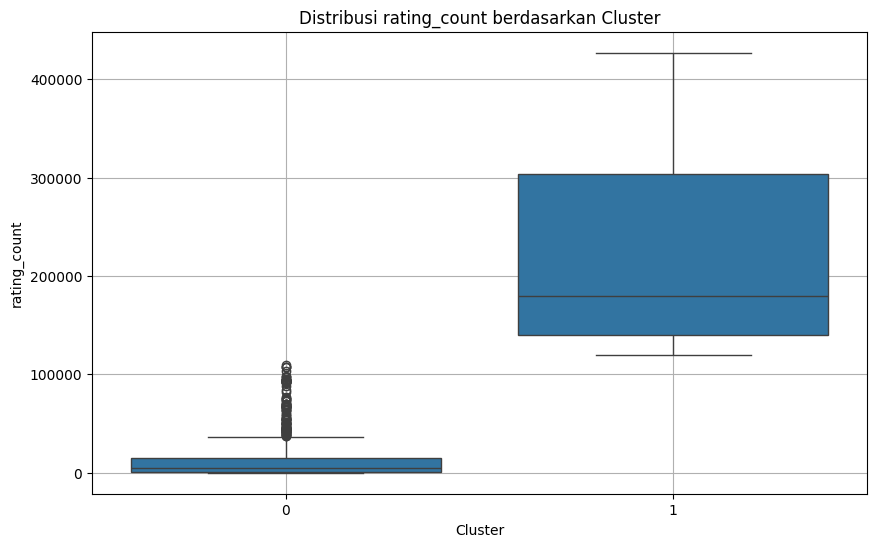

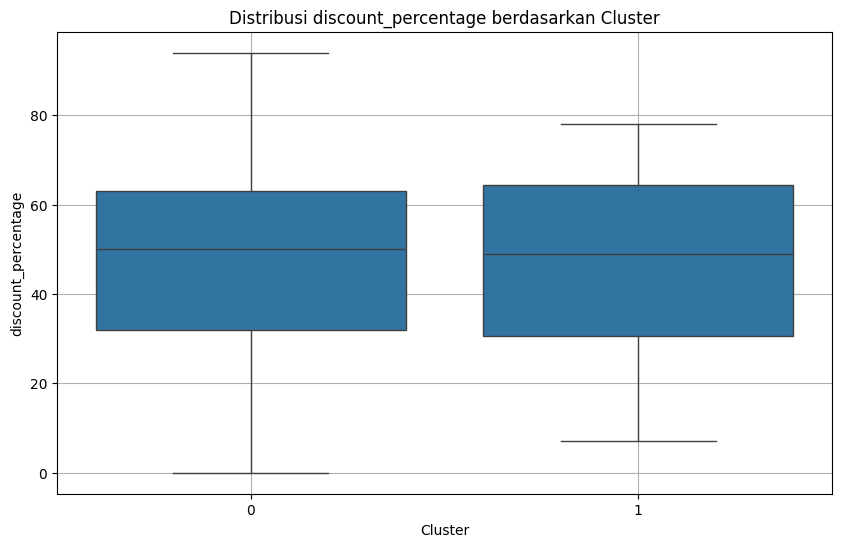

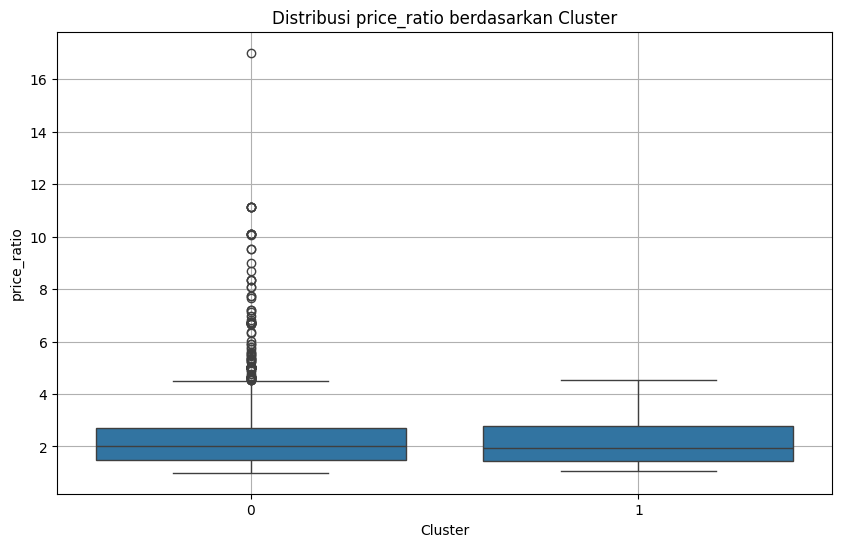

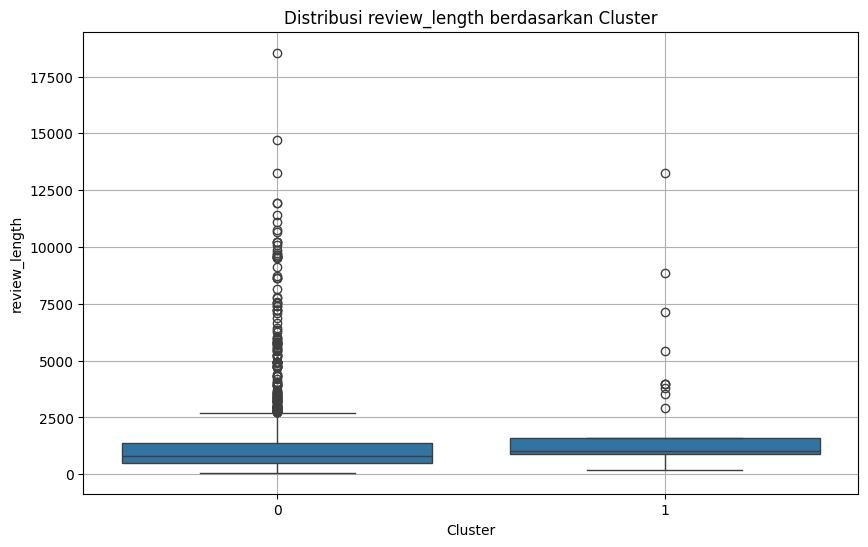

In [53]:
for feature in features:
    plt.figure(figsize=(10, 6))
    sns.boxplot(data=df, x='Cluster', y=feature)
    plt.title(f'Distribusi {feature} berdasarkan Cluster')
    plt.xlabel('Cluster')
    plt.ylabel(feature)
    plt.grid()
    plt.show()

## Model DBSCAN


Pada Tahap ini saya mencoba algoritma DBSCAN.

In [55]:

# Pilih fitur yang akan digunakan untuk clustering
features = ['rating', 'rating_count', 'discount_percentage']
data_selected_features_dbscan = df[features]

# Penskalaan data
scaler = StandardScaler()
data_selected_features_dbscan = scaler.fit_transform(data_selected_features_dbscan)

# Membuat model DBSCAN dengan parameter yang dapat disesuaikan
dbscan = DBSCAN(eps=0.5, min_samples=5)

# Melakukan clustering
dbscan_labels = dbscan.fit_predict(data_selected_features_dbscan)

# Menambahkan label cluster ke DataFrame asli
df['Cluster_DBSCAN'] = dbscan_labels

# Evaluasi model: Periksa jumlah kluster dan noise
n_clusters_ = len(set(dbscan_labels)) - (1 if -1 in dbscan_labels else 0)
n_noise_ = list(dbscan_labels).count(-1)

print(f'Estimated number of clusters: {n_clusters_}')
print(f'Estimated number of noise points: {n_noise_}')

# Menghitung metrik evaluasi jika ada lebih dari satu kluster
if n_clusters_ > 1:
    silhouette_avg = silhouette_score(data_selected_features_dbscan, dbscan_labels)

    print("\nDBSCAN Clustering Evaluation Metrics:")
    print(f"Silhouette Score: {silhouette_avg}")
else:
    print("DBSCAN failed to form multiple clusters, consider adjusting eps or min_samples.")

# Menampilkan hasil clustering pada DataFrame
print(df[['Cluster_DBSCAN'] + features].head())


Estimated number of clusters: 4
Estimated number of noise points: 68

DBSCAN Clustering Evaluation Metrics:
Silhouette Score: 0.3554689722570361
   Cluster_DBSCAN  rating  rating_count  discount_percentage
0               0     4.2       24269.0                 64.0
1               0     4.0       43994.0                 43.0
2               0     3.9        7928.0                 90.0
3               0     4.2       94363.0                 53.0
4               0     4.2       16905.0                 61.0


Score Silhouette DBSCAN ternyata bernilai lebih rendah daripada K-Means

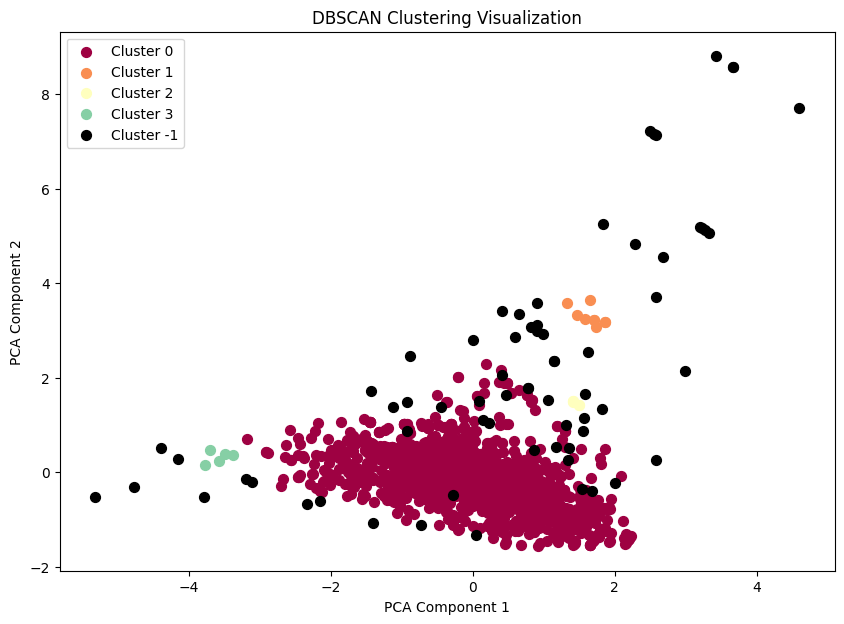

In [56]:

# Reduksi dimensi menggunakan PCA untuk visualisasi 2D
pca = PCA(n_components=2)
data_2d = pca.fit_transform(data_selected_features_dbscan)

# Membuat scatter plot hasil klustering
plt.figure(figsize=(10, 7))
unique_labels = set(dbscan_labels)

# Warna untuk setiap kluster, termasuk noise (label -1)
colors = [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]

for k, col in zip(unique_labels, colors):
    if k == -1:
        # Warna untuk noise
        col = [0, 0, 0, 1]

    class_member_mask = (dbscan_labels == k)

    xy = data_2d[class_member_mask]
    plt.scatter(xy[:, 0], xy[:, 1], s=50, c=[col], label=f'Cluster {k}')

plt.title('DBSCAN Clustering Visualization')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.legend()
plt.show()

# Komparasi nilai Silhouette

Pada Tahap ini dilakukan komaparasi terkait ketiga Model yang telah dibuat

In [59]:

# Calculate silhouette scores for each dataset
silhouette_data_update_features = silhouette_score(data_update_features, kmeans_labels)
silhouette_data_selected_features = silhouette_score(data_selected_features, kmeans.labels_)

# Assuming you have a DBSCAN model and its labels
silhouette_data_selected_features_dbscan = silhouette_score(data_selected_features_dbscan, dbscan_labels)


# Create a table or print the comparison
print("Silhouette Score Comparison:")
print(f"Model 1: {silhouette_data_selected_features}")
print(f"Model 2: {silhouette_data_update_features}")
print(f"Model 3: {silhouette_data_selected_features_dbscan}")

Silhouette Score Comparison:
Model 1: 0.6349327834910277
Model 2: 0.8997343627882889
Model 3: 0.3554689722570361


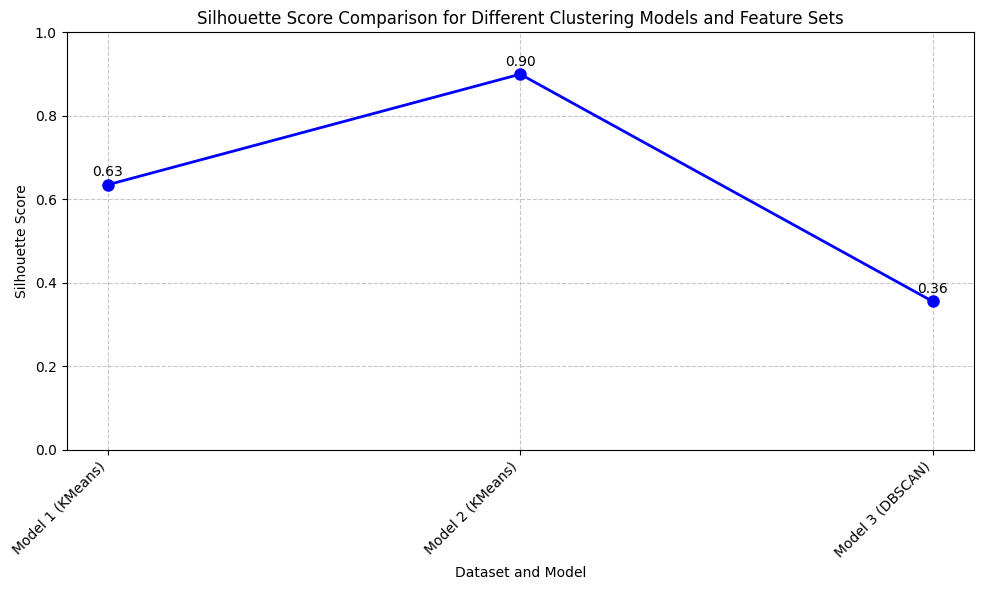

In [61]:
import matplotlib.pyplot as plt

# Data skor silhouette yang diperoleh
scores = {
    "Model 1 (KMeans)": silhouette_data_selected_features,
    "Model 2 (KMeans)": silhouette_data_update_features,
    "Model 3 (DBSCAN)": silhouette_data_selected_features_dbscan
}

# Ekstraksi nama model dan nilai skor untuk plot
labels = list(scores.keys())
values = list(scores.values())

# Membuat plot line
plt.figure(figsize=(10, 6))
plt.plot(labels, values, marker='o', linestyle='-', color='b', linewidth=2, markersize=8)
plt.title("Silhouette Score Comparison for Different Clustering Models and Feature Sets")
plt.xlabel("Dataset and Model")
plt.ylabel("Silhouette Score")
plt.ylim(0, 1)  # Skala silhouette score biasanya antara -1 hingga 1
plt.xticks(rotation=45, ha='right')
plt.grid(visible=True, linestyle='--', alpha=0.7)
plt.tight_layout()

# Menambahkan nilai pada setiap marker
for i, value in enumerate(values):
    plt.text(i, value + 0.02, f"{value:.2f}", ha='center', fontsize=10)

# Menampilkan plot
plt.show()


In [62]:
# memutuskan skema terbaik
silhouette_scores = {
    "Model 1 (KMeans)": silhouette_data_selected_features,
    "Model 2 (KMeans)": silhouette_data_update_features,
    "Model 3 (DBSCAN)": silhouette_data_selected_features_dbscan
}

best_scheme = max(silhouette_scores, key=silhouette_scores.get)
best_score = silhouette_scores[best_scheme]

print("\nModel kluster terbaik:")
print(f"{best_scheme} dengan nilai silhoutte score {best_score:.4f}")


Model kluster terbaik:
Model 2 (KMeans) dengan nilai silhoutte score 0.8997
